<a href="https://colab.research.google.com/github/Ssdosaofc/ML-model-from-scratch/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io
import csv
import copy, math

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/ML/Polynomialdata_train.csv")
test = pd.read_csv("/content/drive/MyDrive/ML/Polynomialdata_test.csv")

In [ ]:
train.head()

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367


In [ ]:
x_train = train.iloc[:, 1].values

x = train.iloc[:, range(1,4)].values

y = train.iloc[:, 0].values

x_test = test.iloc[:, range(0,3)].values

b = 0.



In [ ]:
x

array([[  5.22184894,   7.29511056,  95.71684555],
       [ -5.10628445,   4.22008546,  -6.17236   ],
       [ -4.21805344,  -7.57382297, -39.49388399],
       ...,
       [ 29.85789417,   1.42297302,  75.62050543],
       [ 10.79314567,   1.21597176,  34.43776063],
       [ 12.17170222,  -0.79875632,  60.24598982]])

In [ ]:
x_train

array([ 5.22184894, -5.10628445, -4.21805344, ..., 29.85789417,
       10.79314567, 12.17170222])

In [ ]:
y

array([4.13152828e+06, 3.17297454e-01, 4.67642163e+04, ...,
       3.83560105e+06, 2.58031768e+04, 3.46817108e+05])

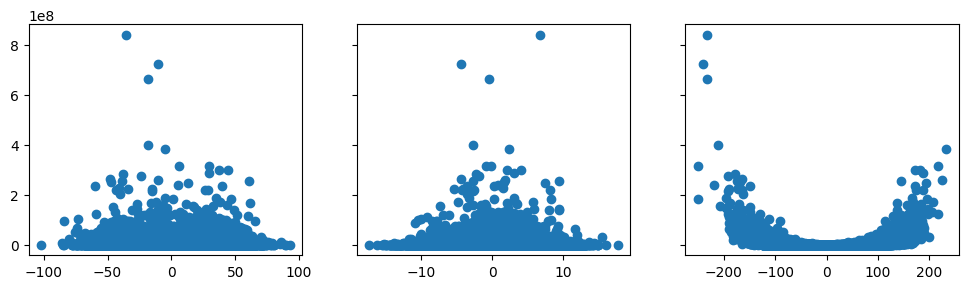

In [ ]:
fig,ax= plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x[:,i],y)
plt.show()

# Working Model

In [ ]:
def normalize_features(x):
    mean = np.mean(x, axis=0)
    std_dev = np.std(x, axis=0)
    normalized_x = (x - mean) / std_dev
    return normalized_x, mean, std_dev

In [ ]:
def cost_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    error = f - y
    target = np.sum(error**2) / (2 * m)
    return target

In [ ]:
def gradient_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    dif = f - y
    dj_dw = np.dot(x.T, dif) / m
    dj_db = np.sum(dif) / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, J_history


## Fourth formula - working

In [ ]:
column_matrix = np.array([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9]])

column_1 = column_matrix[:, 0]
column_2 = column_matrix[:, 1]
column_3 = column_matrix[:, 2]

print("Column 1:", column_1)
print("Column 2:", column_2)
print("Column 3:", column_3)

Column 1: [1 4 7]
Column 2: [2 5 8]
Column 3: [3 6 9]


In [ ]:
def polynomial(n, x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    x3 = x[:, 2]

    result_matrix = np.empty((x.shape[0], 0))

    for i in range(n + 1):
        for j in range(n + 1):
            for k in range(n + 1):
                if i + j + k <= n:
                    power = (x1 ** i) * (x2 ** j) * (x3 ** k)
                    result_matrix = np.column_stack((result_matrix, power))

    return result_matrix


In [ ]:
degree = 6

xa = np.array([[1, 2, 3], [4, 5, 6]])
p_x = polynomial(degree, xa)

p_x

array([[1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02, 7.2900e+02, 2.0000e+00, 6.0000e+00, 1.8000e+01,
        5.4000e+01, 1.6200e+02, 4.8600e+02, 4.0000e+00, 1.2000e+01,
        3.6000e+01, 1.0800e+02, 3.2400e+02, 8.0000e+00, 2.4000e+01,
        7.2000e+01, 2.1600e+02, 1.6000e+01, 4.8000e+01, 1.4400e+02,
        3.2000e+01, 9.6000e+01, 6.4000e+01, 1.0000e+00, 3.0000e+00,
        9.0000e+00, 2.7000e+01, 8.1000e+01, 2.4300e+02, 2.0000e+00,
        6.0000e+00, 1.8000e+01, 5.4000e+01, 1.6200e+02, 4.0000e+00,
        1.2000e+01, 3.6000e+01, 1.0800e+02, 8.0000e+00, 2.4000e+01,
        7.2000e+01, 1.6000e+01, 4.8000e+01, 3.2000e+01, 1.0000e+00,
        3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01, 2.0000e+00,
        6.0000e+00, 1.8000e+01, 5.4000e+01, 4.0000e+00, 1.2000e+01,
        3.6000e+01, 8.0000e+00, 2.4000e+01, 1.6000e+01, 1.0000e+00,
        3.0000e+00, 9.0000e+00, 2.7000e+01, 2.0000e+00, 6.0000e+00,
        1.8000e+01, 4.0000e+00, 1.2000e+01, 8.00

In [ ]:
norm_x, mean_x, std_dev_x = normalize_features(x)

poly_x = polynomial(degree, norm_x)
poly_x

array([[ 1.00000000e+00,  1.71150597e+00,  2.92925267e+00, ...,
         1.21362522e-03,  1.29085263e-03,  1.66282832e-04],
       [ 1.00000000e+00, -1.06472000e-01,  1.13362867e-02, ...,
         8.19250152e-05, -8.09272457e-04,  1.83407607e-04],
       [ 1.00000000e+00, -7.01017772e-01,  4.91425917e-01, ...,
         2.11693548e-04,  5.72664923e-04,  5.96999975e-05],
       ...,
       [ 1.00000000e+00,  1.35293311e+00,  1.83042800e+00, ...,
         6.35106914e+00,  1.65502013e+00,  6.39564896e+00],
       [ 1.00000000e+00,  6.18121976e-01,  3.82074777e-01, ...,
         1.73846474e-02,  8.46042734e-03,  1.37692424e-02],
       [ 1.00000000e+00,  1.07861032e+00,  1.16340023e+00, ...,
         5.56250719e-02, -1.04588626e-02,  2.85027796e-02]])

In [ ]:
w = np.zeros(len(poly_x[0]),)
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
iterations= 1000
alpha = 0.000085

w_final, b_final, J_hist = gradient_descent(poly_x, y, w, b, alpha, iterations)

Iteration    0: Cost 21982724534625.2617
Iteration  100: Cost 228574875087.4173
Iteration  200: Cost 87099410856.9054
Iteration  300: Cost 42932881319.4465
Iteration  400: Cost 23739463136.7193
Iteration  500: Cost 14573668918.1779
Iteration  600: Cost 9844926811.4738
Iteration  700: Cost 7201055980.2808
Iteration  800: Cost 5592742650.5159
Iteration  900: Cost 4531038840.6994


In [ ]:
norm_x_test = (x_test - mean_x) / std_dev_x

poly_x_test = polynomial(degree, norm_x_test)

ycap_test = np.dot(poly_x_test, w_final) + b_final

In [ ]:
ycap= np.dot(poly_x, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 0.9999416999990395


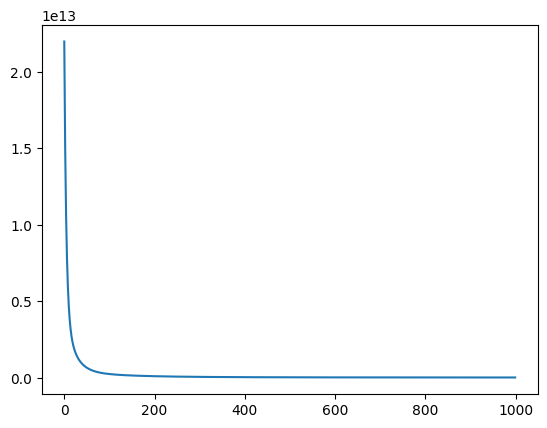

In [ ]:
rng = np.arange(0, iterations)
plt.plot(rng, J_hist)
plt.show()

## First formula

In [ ]:
def add_power_elements(matrix, max_power):
    result_matrix = np.empty((matrix.shape[0], matrix.shape[1] * max_power), dtype=matrix.dtype)
    for i in range(matrix.shape[0]):
        powers = np.array([np.power(matrix[i], p) for p in range(1, max_power + 1)])
        powers = powers.reshape(-1)
        result_matrix[i] = powers
    return result_matrix


degree = 3

x_poly = add_power_elements(x, degree)
print(x_poly)

[[ 5.22184894e+00  7.29511056e+00  9.57168455e+01 ...  1.42387844e+02
   3.88235849e+02  8.76930414e+05]
 [-5.10628445e+00  4.22008546e+00 -6.17236000e+00 ... -1.33141980e+02
   7.51560140e+01 -2.35154744e+02]
 [-4.21805344e+00 -7.57382297e+00 -3.94938840e+01 ... -7.50475008e+01
  -4.34455650e+02 -6.16012519e+04]
 ...
 [ 2.98578942e+01  1.42297302e+00  7.56205054e+01 ...  2.66181289e+04
   2.88131010e+00  4.32432899e+05]
 [ 1.07931457e+01  1.21597176e+00  3.44377606e+01 ...  1.25731505e+03
   1.79792044e+00  4.08417844e+04]
 [ 1.21717022e+01 -7.98756316e-01  6.02459898e+01 ...  1.80324176e+03
  -5.09615836e-01  2.18667597e+05]]


In [ ]:
x_norm = norm(x_poly)

x_norm

array([[ 3.91481055e-096,  5.46913098e-096,  7.17587431e-095, ...,
         3.87131599e-068,  2.48978345e-062,  1.30143220e-017],
       [-3.82817206e-096,  3.16379031e-096, -4.62740695e-096, ...,
         1.58156333e-068,  7.72211548e-072,  3.11126050e-065],
       [-3.16226691e-096, -5.67808116e-096, -2.96084922e-095, ...,
         7.57477199e-072,  1.11555873e-061,  5.44603328e-033],
       ...,
       [ 2.23844084e-095,  1.06680026e-096,  5.66925539e-095, ...,
         7.53795291e-038,  1.00635946e-090,  1.04826112e-021],
       [ 8.09160147e-096,  9.11611796e-097,  2.58179258e-095, ...,
         1.58784457e-055,  1.86993304e-093,  2.27134217e-035],
       [ 9.12510278e-096, -5.98826141e-097,  4.51663078e-095, ...,
         1.94508778e-053,  9.36394056e-101,  1.18035381e-025]])

In [ ]:
iterations= 1000
alpha = 0.006


w_final, b_final, J_hist = gradient_descent(x_norm, y, w, b, alpha, iterations)

m = len(y)


Iteration    0: Cost 66471847441491.1406
Iteration  100: Cost 65384203023446.7031
Iteration  200: Cost 65057745641151.7734
Iteration  300: Cost 64959726214020.2891
Iteration  400: Cost 64930262736360.7656
Iteration  500: Cost 64921373415852.1562
Iteration  600: Cost 64918658555765.6484
Iteration  700: Cost 64917796698818.1406
Iteration  800: Cost 64917490943178.9297
Iteration  900: Cost 64917352078855.0078


In [ ]:
ycap= np.dot(x_norm, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 1.0234395608765823e-05


## Second formula

In [ ]:
def add_single_power(matrix, n):
    powers = np.power(matrix, n)
    result_matrix = np.concatenate((matrix, powers), axis=1)
    return result_matrix

x_pow = add_single_power(x, degree)
print(x_pow)

[[ 5.22184894e+00  7.29511056e+00  9.57168455e+01  1.42387844e+02
   3.88235849e+02  8.76930414e+05]
 [-5.10628445e+00  4.22008546e+00 -6.17236000e+00 -1.33141980e+02
   7.51560140e+01 -2.35154744e+02]
 [-4.21805344e+00 -7.57382297e+00 -3.94938840e+01 -7.50475008e+01
  -4.34455650e+02 -6.16012519e+04]
 ...
 [ 2.98578942e+01  1.42297302e+00  7.56205054e+01  2.66181289e+04
   2.88131010e+00  4.32432899e+05]
 [ 1.07931457e+01  1.21597176e+00  3.44377606e+01  1.25731505e+03
   1.79792044e+00  4.08417844e+04]
 [ 1.21717022e+01 -7.98756316e-01  6.02459898e+01  1.80324176e+03
  -5.09615836e-01  2.18667597e+05]]


In [ ]:
x_nor = norm(x_pow)

x_nor

array([[ 3.41301097e-08,  4.76809893e-08,  6.25607227e-07,
         9.30649810e-07,  2.53751732e-06,  5.73163482e-03],
       [-3.33747778e-08,  2.75825635e-08, -4.03426691e-08,
        -8.70218657e-07,  4.91221219e-07, -1.53697614e-06],
       [-2.75692821e-08, -4.95026593e-08, -2.58132820e-07,
        -4.90511974e-07, -2.83961087e-06, -4.02627021e-04],
       ...,
       [ 1.95151797e-07,  9.30058030e-09,  4.94257144e-07,
         1.73976625e-04,  1.88323008e-08,  2.82639012e-03],
       [ 7.05442171e-08,  7.94761590e-09,  2.25085896e-07,
         8.21783648e-06,  1.17512442e-08,  2.66942724e-04],
       [ 7.95544905e-08, -5.22068734e-09,  3.93769001e-07,
         1.17860244e-05, -3.33085935e-09,  1.42921581e-03]])

In [ ]:
iterations= 1000
alpha = 0.006


w_final, b_final, J_hist = gradient_descent(x_nor, y, w, b, alpha, iterations)

m = len(y)


Iteration    0: Cost 66471847441491.1406
Iteration  100: Cost 65384203023446.7031
Iteration  200: Cost 65057745641151.7734
Iteration  300: Cost 64959726214020.2891
Iteration  400: Cost 64930262736360.7656
Iteration  500: Cost 64921373415852.1562
Iteration  600: Cost 64918658555765.6484
Iteration  700: Cost 64917796698818.1406
Iteration  800: Cost 64917490943178.9297
Iteration  900: Cost 64917352078855.0078


In [ ]:
ycap= np.dot(x_norm, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 1.0234395608765823e-05


## Third formula

In [ ]:
def combinations_with_replacement(iterable, r):
    pool = tuple(iterable)
    n = len(pool)
    if not n and r:
        return
    indices = [0] * r
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != n - 1:
                break
        else:
            return
        indices[i:] = [indices[i] + 1] * (r - i)
        yield tuple(pool[i] for i in indices)

In [ ]:
#formula to be modified
def create_polynomial_features(x, degree):
    m, n = x.shape
    new_x = np.ones((m, 1))

    for d in range(1, degree + 1):
        for comb in combinations_with_replacement(range(n), d):
            new_feature = np.prod(x[:, comb], axis=1).reshape(-1, 1)
            new_x = np.hstack((new_x, new_feature))

        if d == degree:
            all_features_product = np.prod(x, axis=1).reshape(-1, 1)
            new_x = np.hstack((new_x, all_features_product))

    return new_x

In [ ]:
degree = 2
new_x = create_polynomial_features(x, degree)

new_x[0]

array([1.00000000e+00, 5.22184894e+00, 7.29511056e+00, 9.57168455e+01,
       2.72677064e+01, 3.80939654e+01, 4.99818909e+02, 5.32186381e+01,
       6.98264971e+02, 9.16171452e+03, 3.64623420e+03])

In [ ]:
iterations= 1000
alpha = 0.006


w_final, b_final, J_hist = gradient_descent(x_norm, y, w, b, alpha, iterations)

m = len(y)


Iteration    0: Cost 66471847441491.1406
Iteration  100: Cost 65384203023446.7031
Iteration  200: Cost 65057745641151.7734
Iteration  300: Cost 64959726214020.2891
Iteration  400: Cost 64930262736360.7656
Iteration  500: Cost 64921373415852.1562
Iteration  600: Cost 64918658555765.6484
Iteration  700: Cost 64917796698818.1406
Iteration  800: Cost 64917490943178.9297
Iteration  900: Cost 64917352078855.0078


In [ ]:
ycap= np.dot(x_norm, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : 1.0234395608765823e-05


# Failed model-1

In [ ]:
def norm(v):
  norm = np.linalg.norm(v)
  if norm == 0:
    return v
  return v/norm

In [ ]:
def poly(X):
    m, n = X.shape
    X_poly = np.ones((m, 1))
    for i in range(n):
        x = X[:, i:i+1]
        x_poly = np.hstack((np.ones((m, 1)), x, x**2))
        X_poly = np.hstack((X_poly, x_poly))
    return X_poly


In [ ]:
def cost_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    error = f - y
    target = np.sum(error**2) / (2 * m)
    return target

In [ ]:
def gradient_function(x, y, w, b):
    m = len(y)
    f = np.dot(x, w) + b
    dif = f - y
    dj_dw = np.dot(x.T, dif) / m
    dj_db = np.sum(dif) / m
    return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w, b, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        dj_dw, dj_db = gradient_function(x, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = cost_function(x, y, w, b)
        J_history.append(cost)

        if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return w, b, J_history


In [ ]:
iterations= 1000
alpha = 2


X_poly = poly(x_train)

X_norm = norm(X_poly)


w_final, b_final, J_hist = gradient_descent(X_norm, y, w, b, alpha, iterations)

m = len(y)


TypeError: cannot unpack non-iterable int object

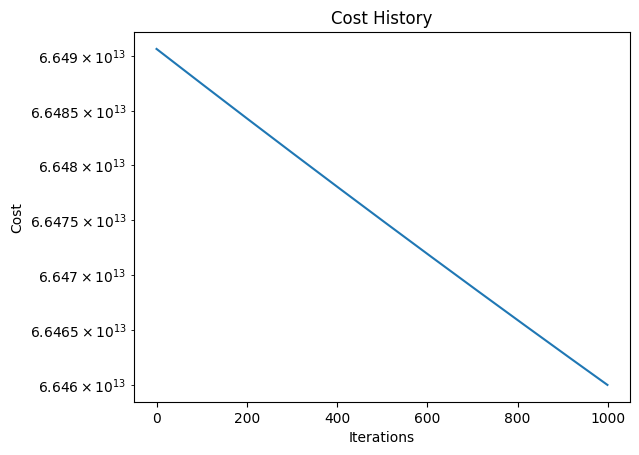

In [ ]:
rng = np.arange(0, iterations)
plt.plot(rng, J_hist)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

In [ ]:
ycap= np.dot(X_norm, w_final) + b_final
d1 = y - ycap
d2 = y - y.mean()
r2 =1- d1.dot(d1)/d2.dot(d2)
print("r2 error is :",r2)

r2 error is : -0.02375382002407256


# Failed model-2

In [ ]:
def norm(v):
    norm_value = np.linalg.norm(v)
    if norm_value == 0:
        return np.zeros_like(v)
    return v / norm_value

X_normalized = norm(x_train)

In [ ]:
def add_polynomial_features(X, degree):
    m,n = X.shape
    X_poly = np.ones((m, 1))
    for d in range(1, degree + 1):
        for i in range(n):
            X_poly = np.hstack((X_poly, np.power(X[:, i:i+1], d)))
    return X_poly

degree = 3
X_poly = add_polynomial_features(X_normalized, degree)


In [ ]:
def initialize_parameters(n):
    return np.zeros((n, 1))
theta = initialize_parameters(X_poly.shape[1])


In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    J = (1 / (2 * m)) * np.sum(np.square(h - y))
    return J


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for i in range(iterations):
        h = np.dot(X, theta)
        error = h - y
        gradient = (1 / m) * np.dot(X.T, error)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        J_history.append(cost)

        if i % (iterations // 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.4f}")

    return theta, J_history

In [ ]:
alpha = 0.01
iterations = 1000

theta_final, J_history = gradient_descent(X_poly, y, theta, alpha, iterations)


In [ ]:
print("X_poly shape:", X_poly.shape)
print("Theta shape:", theta.shape)

NameError: name 'X_poly' is not defined

In [ ]:
plt.plot(range(iterations), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()

# Failed model-3

In [ ]:
X = x_train.reshape(-1,1)
X

array([[ 5.22184894],
       [-5.10628445],
       [-4.21805344],
       ...,
       [29.85789417],
       [10.79314567],
       [12.17170222]])

In [ ]:
y = y.reshape(len(y),1)
y

array([[4.13152828e+06],
       [3.17297454e-01],
       [4.67642163e+04],
       ...,
       [3.83560105e+06],
       [2.58031768e+04],
       [3.46817108e+05]])

In [ ]:
def poly_features(features, X):
  data = pd.DataFrame(np.zeros((X.shape[0],features)))
  for i in range(1,features+1):
    data.iloc[:,i-1] = (X**i).reshape(-1,1)
  X_poly = np.array(data.values.tolist())
  return X_poly

In [ ]:
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    data_test_size = int(X.shape[0] * test_size)

    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [ ]:
def pred_to_plot(predict_func, W_trained, X):
    prediction_values = list()
    for i in range(X.shape[0]):
        value = predict_func(W_trained, X[i])
        prediction_values.append(value)
    return prediction_values


In [ ]:
class polynomialRegression():

  def __init__(self):
    # No instance Variables required
    pass

  def forward(self, X, y, W):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    W (array) : Weights

    Returns:
    loss (float) : Calculated Squared Error Loss for y and y_pred
    y_pred (array) : Predicted Target Variable
    """
    y_pred = np.dot(X, W.T)
    loss = np.mean((y_pred - y) ** 2) / 2
    return loss, y_pred

  def updateWeights(self, X, y_pred, y_true, W, alpha):
    """
    Parameters:
    X (array) : Independent Features
    y_pred (array) : Predicted Target Variable
    y_true (array) : Dependent Features/ Target Variable
    W (array) : Weights
    alpha (float) : learning rate

    Returns:
    W (array) : Update Values of Weight
    """
    gradient = np.dot(X.T, (y_pred - y_true)) / len(y_true)
    W -= alpha * gradient
    return W

  def train(self, X, y, epochs=10, alpha=0.001):
    """
    Parameters:
    X (array) : Independent Features
    y (array) : Dependent Features/ Target Variable
    epochs (int) : Number of epochs for training, default value is 10
    alpha (float) : learning rate, default value is 0.001

    Returns:
    W (array) : Trained Weights
    train_loss (list) : Calculated Squared Error Loss for y and y_pred during training
    """
    num_features = X.shape[1]
    W = np.random.randn(1, num_features) / np.sqrt(num_features)  # Weight Initialization

    train_loss = []
    for _ in range(epochs):
      loss, y_pred = self.forward(X, y, W)
      train_loss.append(loss)
      W = self.updateWeights(X, y_pred, y, W, alpha)

    return W, train_loss

  def test(self, X_test, y_test, W_trained):
    """
    Parameters:
    X_test (array) : Independent Features from the Test Set
    y_test (array) : Dependent Features/ Target Variable from the Test Set
    W_trained (array) : Trained Weights

    Returns:
    test_pred (array) : Predicted Target Variable
    test_loss (float) : Calculated Squared Error Loss for y and y_pred on test data
    """
    test_pred = np.dot(X_test, W_trained.T)
    test_loss = np.mean((test_pred - y_test) ** 2) / 2
    return test_pred, test_loss

  def predict(self, W_trained, X_sample):
    prediction = np.dot(X_sample, W_trained.T)
    return prediction

  def plotLoss(self, loss):
    """
    Parameters:
    loss (list) : Calculated Squared Error Loss for y and y_pred

    Returns: None
    Plots a graph of Loss vs Epochs
    """
    plt.plot(loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [ ]:
w = np.random.randn(10)

In [ ]:
X = poly_features(2,X)

In [ ]:
X = np.concatenate((X,np.ones((50000,1))), axis = 1)
X

array([[  5.22184894,  27.26770638,   1.        ],
       [ -5.10628445,  26.07414084,   1.        ],
       [ -4.21805344,  17.79197485,   1.        ],
       ...,
       [ 29.85789417, 891.49384423,   1.        ],
       [ 10.79314567, 116.49199344,   1.        ],
       [ 12.17170222, 148.15033505,   1.        ]])

In [ ]:
y

array([4.13152828e+06, 3.17297454e-01, 4.67642163e+04, ...,
       3.83560105e+06, 2.58031768e+04, 3.46817108e+05])

In [ ]:
regressor = polynomialRegression()


In [ ]:
W_trained, train_loss, num_epochs = regressor.train(X, y, epochs=200, alpha=0.00001)

# Failed model-4

In [ ]:
def add_polynomial_features(X):
    m, n = X.shape
    X_poly = np.ones((m, 1))
    for i in range(n):
        x = X[:, i:i+1]
        x_poly = np.hstack((np.ones((m, 1)), x, x**2))
        X_poly = np.hstack((X_poly, x_poly))
    return X_poly


X_train_poly = add_polynomial_features(x_train)

# Add polynomial features to test set
X_test_poly = add_polynomial_features(x_test)

# Define polynomial regression class
class PolynomialRegression:
    def __init__(self):
        self.W = None

    def train(self, X, y, epochs=1000, alpha=0.001):
        m, n = X.shape
        self.W = np.random.randn(n)  # Initialize weights
        for _ in range(epochs):
            y_pred = np.dot(X, self.W)
            error = y_pred - y
            gradient = np.dot(X.T, error) / m
            self.W -= alpha * gradient

    def predict(self, X):
        return np.dot(X, self.W)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred)**2)

# Train polynomial regression model
model = PolynomialRegression()
model.train(X_train_poly, y)

# Predict on test set
y_pred_test = model.predict(X_test_poly)

# Calculate MSE on test set
mse_test = model.mse(y, y_pred_test)
print("Test MSE:", mse_test)

<ipython-input-74-af9b0171ba4c>:28: RuntimeWarning: invalid value encountered in subtract
  self.W -= alpha * gradient


ValueError: operands could not be broadcast together with shapes (50000,) (10000,) 